<div style="direction:rtl;line-height:300%;background-color:#282C34;border-radius: 25px;">
    <img src='https://me.ut.ac.ir/documents/84413608/105534126/%D9%86%D8%B4%D8%A7%D9%86%20%D8%AF%D8%A7%D9%86%D8%B4%DA%AF%D8%A7%D9%87%20%D8%AA%D9%87%D8%B1%D8%A7%D9%86_%D8%AD%D8%A7%D8%B4%DB%8C%D9%87_vectorized2.png?t=1617776323063' alt="UT logo" width="110" height="110" align="left" style='padding-top: 15px; padding-left: 20px;'>
    <img src="https://engstudent.ut.ac.ir/wp-content/uploads/Fanni-Transparent.png" width="150" height="112" align="right" style='padding-top: 15px; padding-right: 20px;'>
    <font face="XB Zar" size=5>
        <div align=center>
            <font face="IranNastaliq" size=30 color=white>
                <p></p>
                <p></p>
به نام خدا
            </font>
            <br />
            <br />
            <font color=#1597E5>
دانشگاه تهران - دانشکده مهندسی برق و کامپیوتر
            </font>
            <br />
            <font color=#69DADB>
هوش مصنوعی
            </font>
            <br />
            <font color=#FFA400>
پاییز ۱۴۰۰
        </div>
        <hr color=#6ECB63/>
        <font color=#FF5C58 size=6>
            <div align=center>
پروژه پنجم - شبکه‌های عصبی - فاز اول
            </div>
        </font>
        <br />
        <div align=center>
        <font color=yellow>
حسام اسداله‌زاده 
            <br />
            شماره دانشجویی: ۸۱۰۱۹۸۳۴۶
            </font>
        </div>
        <!hr color=#6ECB63/>
        <style type="text/css" scoped>
        p{
        border: 1px solid #a2a9b1;background-color: #f8f9fa;display: inline-block;
        };
        </style>            

</div>
</div>
</div>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
import matplotlib.image as mpimg
from PIL import Image

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [4]:
HORSE = 0
CAT = 1

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# !unzip "/content/drive/MyDrive/cifar_dataset.zip" -d "/content/drive/MyDrive/cifar"

In [7]:
df = pd.read_csv('labels.csv')

In [8]:
df

,id,label
0,8,horse
1,10,cat
2,12,horse
3,13,horse
4,18,cat
...,...,...
9995,49979,horse
9996,49980,cat
9997,49983,cat
9998,49984,cat


In [9]:
cat_map = {'horse': HORSE, 'cat': CAT}
df['label'] = df['label'].map(cat_map)
df

,id,label
0,8,0
1,10,1
2,12,0
3,13,0
4,18,1
...,...,...
9995,49979,0
9996,49980,1
9997,49983,1
9998,49984,1


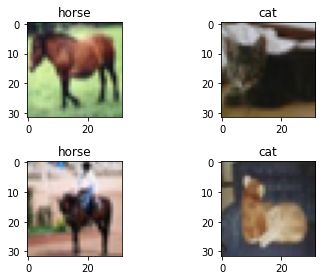

In [10]:
img = mpimg.imread('./data\\8.png')
plt.subplot(221)
plt.imshow(img)
plt.title('horse')
img = mpimg.imread('./data\\10.png')
plt.subplot(222)
plt.imshow(img)
plt.title('cat')
img = mpimg.imread('./data\\12.png')
plt.subplot(223)
plt.imshow(img)
plt.title('horse')
img = mpimg.imread('./data\\18.png')
plt.subplot(224)
plt.imshow(img)
plt.title('cat')
plt.tight_layout()
plt.show()

In [11]:
images = [None]*len(df)
for i in range(len(df)):
    im=Image.open('./data\\'+str(df['id'][i])+'.png').convert('L')
    images[i] = list(np.array(im).flatten())
    im.close()

In [12]:
df['img'] = images
df

,id,label,img
0,8,0,"[33, 34, 41, 75, 76, 43, 42, 56, 70, 77, 102, ..."
1,10,1,"[124, 103, 93, 99, 101, 136, 171, 170, 143, 93..."
2,12,0,"[147, 171, 169, 173, 201, 212, 196, 135, 119, ..."
3,13,0,"[203, 200, 200, 201, 201, 201, 202, 202, 202, ..."
4,18,1,"[105, 135, 145, 130, 82, 55, 48, 52, 52, 53, 5..."
...,...,...,...
9995,49979,0,"[162, 83, 104, 107, 104, 104, 108, 119, 126, 1..."
9996,49980,1,"[4, 4, 5, 0, 65, 174, 167, 154, 153, 150, 113,..."
9997,49983,1,"[41, 39, 39, 40, 42, 42, 44, 46, 47, 48, 49, 5..."
9998,49984,1,"[32, 32, 30, 31, 33, 37, 38, 41, 88, 147, 164,..."


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['img']], df['label'], test_size=0.15, random_state=42)
X_train.head()

,img
8701,"[103, 81, 85, 83, 79, 73, 101, 95, 73, 84, 86,..."
3429,"[6, 7, 8, 10, 11, 13, 10, 7, 14, 11, 7, 20, 42..."
8870,"[237, 236, 236, 237, 237, 237, 237, 237, 237, ..."
6962,"[250, 247, 249, 248, 246, 248, 249, 249, 249, ..."
2088,"[255, 255, 255, 255, 255, 255, 255, 255, 255, ..."


In [14]:
min([min(df['img'][i]) for i in range(len(df))]), max([max(df['img'][i]) for i in range(len(df))])

(0, 255)

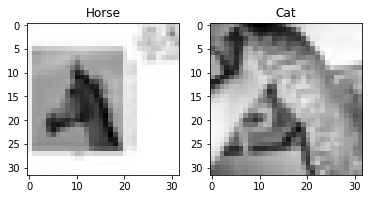

In [15]:
sample = X_train[Y_train==HORSE].sample()['img']
sample2 = X_train[Y_train==CAT].sample()['img']
plt.subplot(121)
plt.imshow(np.reshape(sample[sample.index[0]],(32,32)), cmap='gray')
plt.title('Horse')
plt.subplot(122)
plt.imshow(np.reshape(sample2[sample2.index[0]], (32,32)), cmap='gray')
plt.title('Cat')
plt.show()

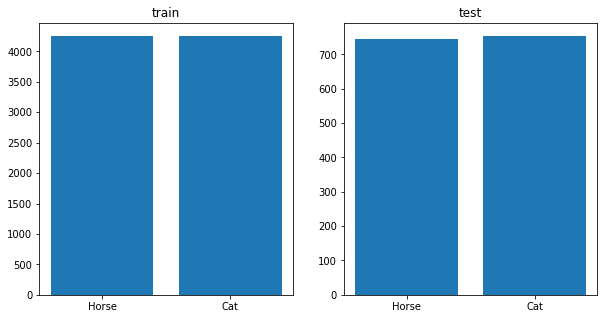

In [16]:
f = plt.figure(figsize=(10,5))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax.bar(['Horse', 'Cat'], [len(Y_train)-Y_train.sum(), Y_train.sum()])
ax2.bar(['Horse', 'Cat'], [len(Y_test)-Y_test.sum(), Y_test.sum()])
ax.set_title('train')
ax2.set_title('test')
plt.show()

In [17]:
res = []
for x in X_train['img']:
    res.append(list(np.array(x)/255))
X_train['img'] = res
res = []
for x in X_test['img']:
    res.append(list(np.array(x)/255))
X_test['img'] = res
X_train.head()

,img
8701,"[0.403921568627451, 0.3176470588235294, 0.3333..."
3429,"[0.023529411764705882, 0.027450980392156862, 0..."
8870,"[0.9294117647058824, 0.9254901960784314, 0.925..."
6962,"[0.9803921568627451, 0.9686274509803922, 0.976..."
2088,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ..."


# Dataloader

In [18]:
class Dataloader:
    '''
    This class prepares the dataset for the neural network.
    '''
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):
        '''
        This is the constructor. It gets dataset information and initializes the 
        Dataloader class fields.
            Parameters:
                data: features your dataset in pandas.Dataframe format.
                labels: labels of your dataset in pandas.Dataframe format.
                n_classes: number of classes you have in your dataset.
                batch_size: the number of samples that will be propagated through the network.
                shuffle: boolean value indicating whether or not the dataset should be shuffled
        '''

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        '''
        This private method gets labels and provides one_hot vectors of labels.
        For categorical variables where no such ordinal relationship exists,
        the integer encoding is not enough.
        In this case, a one-hot encoding can be applied to the integer representation.
        This is where the integer encoded variable is removed, and a new binary variable is
        added for each unique integer value.
        example:
            red,    green,    blue
            1,      0,        0
            0,      1,        0
            0,      0,        1
                Parameters:
                        label: lables of your dataset in pandas.Dataframe format.
                        n_classes: number of classes you have in your dataset.
                
                Returns:
                    onehot_vectors: onehot vectors of the labels
        '''
        # TODO: Implement
        labels = labels.astype(int)
        onehot_vectors = np.zeros((labels.size, n_classes))
        onehot_vectors[np.arange(labels.size), labels['label']] = 1.0
        return onehot_vectors
    
    def __shuffle_dataset(self):
        '''
        This private method shuffles your dataset.
        It uses data and onehot_labels to shuffle them
        symmetrical.
        '''
        # TODO: Implement
        self.__data, self.__onehot_labels = shuffle(self.__data, self.__onehot_labels)
    
    def __iter__(self):
        '''
        The __iter__() function returns an iterator for the
        given object (array, set, tuple, etc., or custom objects).
        This will return your dataset in the batch_size given. This should
        be used to provide data for the neural network.
        '''
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))
    

# Activation Functions

## Identical Activation Function

In [19]:
class Identical:
    '''
    This is the Identical activation function. This activation function just
    return the value it gets.
    '''
    
    def __init__(self): pass
    '''
    This is the constructor. It does not have any fields
    as a result, there is no need to do anything in the constructor.
    '''
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        As this is an identical activity function, it just 
        returns np.matrix of the input.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_value: np.matrix of input with float datatypes
        '''
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        '''
        This method returns the derivation of the input.
        As the derivation of x is one, this method returns
        a matrix of one with the shape of the input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_derivative: np.matrix of ones with matrix shape
        '''
        identical_derivative = np.matrix(np.ones(matrix.shape))
        return identical_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _value method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)


In [20]:
m = np.matrix([[-1,2],[3,-4]])
identical = Identical()
print(identical(m))
print(identical.derivative(m))

[[-1.  2.]
 [ 3. -4.]]
[[1. 1.]
 [1. 1.]]


## RELU Activation Function

In [21]:
class Relu:
    '''
    This is the Relu activation function. 
    The rectified linear activation function or ReLU for short
    is a piecewise linear function that will output the input directly
    if it is positive, otherwise, it will output zero.
    '''
    
    def __init__(self): pass
    '''
    This is the constructor. It does not have any fields
    as a result, there is no need to do anything in the constructor.
    '''
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set 0 in the matrix if the value is less than 0 else, it returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        # TODO: Implement
        relu_value = np.array(matrix, dtype=float)
        relu_value = np.maximum(relu_value, 0) #or using np.where()
        return relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_derivative: np.matrix of relu activation function derivation result
        '''
        # TODO: Implement
        relu_derivative = np.array(matrix, dtype=float)
        relu_derivative = np.where(relu_derivative > 0, 1.0, 0.0)
        return relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _relu method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __relu(matrix): __relu return value for the input matrix
        '''
        return self.__val(matrix)


In [22]:
m = np.matrix([[-1,2],[3,-4]])
relu = Relu()
print(relu(m))
print(relu.derivative(m))

[[0. 2.]
 [3. 0.]]
[[0. 1.]
 [1. 0.]]


## LeakyRELU Activation Function

In [23]:
class LeakyRelu:
    '''
    This is the Leaky Relu activation function. 
    Leaky Rectified Linear Unit, or Leaky ReLU,
    is a type of activation function based on a ReLU,
    but it has a small slope for negative values instead
    of a flat slope.
    '''
    
    def __init__(self, negative_slope=0.01):
        '''
        This is the constructor.
        It sets negative_slope field.
            Parameters:
                negative_slope: slope for negative input values
        '''
        self.negative_slope = negative_slope
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set negative_slope*value in the matrix if the value is less than 0, else it
        returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        # TODO: Implement
        temp = np.matrix(matrix, dtype=float)
        leaky_relu_value = np.maximum(temp, temp*self.negative_slope)
        return leaky_relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of leaky relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                leacky_relu_derivative: np.matrix of leaky relu activation function derivation result
        '''
        # TODO: Implement
        leaky_relu_derivative = np.array(matrix, dtype=float)
        leaky_relu_derivative = np.where(leaky_relu_derivative > 0, 1.0, self.negative_slope)
        return leaky_relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)


In [24]:
m = np.matrix([[-1,2],[3,-4]])
lrelu = LeakyRelu()
print(lrelu(m))
print(lrelu.derivative(m))

[[-0.01  2.  ]
 [ 3.   -0.04]]
[[0.01 1.  ]
 [1.   0.01]]


## Sigmoid Activation Function

In [25]:
class Sigmoid:
    '''
    A sigmoid function is a mathematical function having a
    characteristic "S"-shaped curve or sigmoid curve.
    It return S(x)=1/(1+e^-x)
    '''
    def __init__(self): pass
    
    def __val(self, matrix):
        '''
        Returns 1/(1+e^-x) of values
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_value: np.matrix of relu activation function result
        '''
        # TODO: Implement
        sigmoid_value = np.matrix(1/(1 + np.exp(-matrix)), dtype = float)
        return sigmoid_value
    
    def derivative(self, matrix):
        '''
        Returns the derivation value of sigmoid function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of sigmoid activation function derivation result
        '''
        # TODO: Implement
        sigmoid = self.__val(matrix)
        sigmoid_derivative = np.multiply(sigmoid, np.matrix(1 - sigmoid))
        
        return sigmoid_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)


In [26]:
m = np.matrix([[0,2],[3,-4]])
sgm = Sigmoid()
print(sgm(m))
print(sgm.derivative(m))

[[0.5        0.88079708]
 [0.95257413 0.01798621]]
[[0.25       0.10499359]
 [0.04517666 0.01766271]]


<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png width=400 style="background-color:white;" />

## Softmax Activation Function

In [27]:
class Softmax:
    '''
    The softmax function, also known as softargmax  or normalized
    exponential function is a generalization of the logistic
    function to multiple dimensions. It is used in multinomial logistic
    regression and is often used as the last activation function of a neural
    network to normalize the output of a network to a probability distribution
    over predicted output classes, based on Luce's choice axiom.
    Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
    '''
        
    def __init__(self): pass
    '''
    This is the constructor. It does not have any fields
    as a result, there is no need to do anything in the constructor.
    '''

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the softmax on that.
        Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        # TODO: Implement
        matrix -= matrix.max(1)
        softmax_value = np.matrix(np.exp(matrix)/np.exp(matrix).sum(1), dtype=float)
        return softmax_value
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)


In [28]:
test = np.array([[-1, 2, -3, 4, -5, 6]])
sm = Softmax()
print(sm(test))

[[7.89711322e-04 1.58617759e-02 1.06875805e-04 1.17203552e-01
  1.44640674e-05 8.66023621e-01]]


## Tanh Activation Function

In [29]:
class Tanh:
    
    def __init__(self): pass
    '''
    This is the constructor. It does not have any fields
    as a result, there is no need to do anything in the constructor.
    '''

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It performs Tanh on the values.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                tanh_value: np.matrix of Tanh activation function result
        '''
        # TODO: Implement
        tanh_value = np.tanh(matrix)
        return tanh_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of Tanh function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                tanh_derivative: np.matrix of Tanh activation function derivation result
        '''
        # TODO: Implement
        tanh_derivative = 1 - np.power(np.tanh(matrix), 2)
        return tanh_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)


In [30]:
m = np.matrix([[0,2],[3,-4]])
tanh = Tanh()
print(tanh(m))
print(tanh.derivative(m))

[[ 0.          0.96402758]
 [ 0.99505475 -0.9993293 ]]
[[1.         0.07065082]
 [0.00986604 0.00134095]]


<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/8/87/Hyperbolic_Tangent.svg/2560px-Hyperbolic_Tangent.svg.png width=400 style="background-color:white;" />

## Image
<img src=https://miro.medium.com/max/1400/1*WePYX1teg2OgyCSo8mn0WQ.png width=700 align="center"/>

<img src=https://miro.medium.com/max/3000/1*lyzkak3mPNKmoxs0n-il4Q.png width=700 align="center"/>

# Loss Function

In [31]:
class CrossEntropy: #(with softmax)
    '''
    Cross-entropy is a measure of the difference between two probability
    distributions for a given random variable or set of events. You might
    recall that information quantifies the number of bits required to encode
    and transmit an event.
    The above image can help you.
    '''
    
    def __init__(self): pass
    '''
    This is the constructor. It does not have any fields
    as a result, there is no need to do anything in the constructor.
    '''

    def __val(self, true_val, expected_val):
        '''
        L(y^, y) = - Σ (y^(k)log (y^)^(k)) for k in K
        Parameters:
            true_val: calculated values (generated by neural network)
            expected_val: real values in dataset
        Returns:
            cross_entropy_value: cross entropy of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
        # TODO: Implement
        p = Softmax()(true_val)
        cross_entropy_value = -np.multiply(expected_val, np.ma.log(p)).sum(1)
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        '''
        Returns derivation of cross entropy.
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                cross_entropy_derivative: cross entropy derivation of inputs
        '''
        assert np.shape(true_val)==np.shape(expected_val)
        # TODO: Implement
        # The softmax and the cross entropy loss fit together like bread and butter.
        # Here is why: to train the network with backpropagation, you need to calculate
        # the derivative of the loss. In the general case, that derivative can 
        # get complicated. But if you use the softmax and the cross entropy loss,
        # that complexity fades away. Instead of a long clunky formula,
        #  you end up with this terse, easy to compute thing
        p = Softmax()(true_val)
        cross_entropy_derivative = p - expected_val
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(true_val, expected_val)

# Layer

In [32]:
class Layer:
    '''
    The layer class is used to define neural network layers.
    It stores all needed information for each layer, such as neurons count,
    weight matrix, bias, the output after applying the activation function, etc.
    '''

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, activation=Identical(), initial_weight='uniform', 
                 **initializing_parameters):
        '''
        Parameters:
            input_size: the size of the input of this layer.
            output_size: the size of the output after this layer.
            activation: the activation function. It can be initialized to either of the previously defined activation classes.
                               default is an Identical activation function.
            initial_weight: either normal or uniform. It defines the method for weight initialization.
        '''
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        '''
        It calculates the output of this layer for the layer_input argument.
        This method also stores __last_input, __last_activation_input, and __last_activation_derivative
        for future use in backpropagation.
        Parameters:
            layer_input: 2d np.matrix representing the input matrix of this layer.
        Returns:
            Final output of this layer after applying the activation function.
        '''
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        # TODO: Implement
        self.__last_input = layer_input
        self.__last_activation_input =  (layer_input@self.__weight)+self.__bias
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_input)
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        '''
        It updates Layer weights according to the backpropagation matrix and learning rate.
        This method updates bias values as well.
        Parameters:
            backprop_tensor: 2d np.matrix passed from the next layer containing gradient values.
            lr: learning rate
        Returns:
            backprop_tensor to be used by the previous layer.
        '''
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        # TODO: Implement
        inputT = self.__last_input.transpose()
        dy = np.multiply(backprop_tensor, self.__last_activation_derivative)
        dw = np.matmul(inputT, dy)
        backprop_tensor = np.matmul(dy, self.__weight.transpose())
        self.__weight -= dw * lr
        db = np.matmul(np.matrix(np.tile(1, (1, dy.shape[0]))), dy)
        self.__bias -= db * lr
        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a uniform distribution between low and high values.
        It uses default low and high values unless low or high are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom low or high values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using uniformly distributed values.
        '''
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        # TODO: Implement
        weights = np.random.uniform(low=low, high=high, size=(dim1, dim2))
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a normal distribution with mean and var values.
        It uses default mean and variance values unless mean or var are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom mean or var values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using normaly distributed values.
        ''' 
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        # TODO: Implement
        weights = np.random.normal(loc=mean, scale=np.sqrt(var), size=(dim1, dim2))
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

In [33]:
class FeedForwardNN:
    '''
    This class is used in order to implement custom feed-forward neural networks.
    The FeedForwardNN class stores a list of layers that determines all network layers.
    It also consists of the learning rate and loss function.
    '''
    def __init__(self, input_shape):
        '''
        Parameters:
            input_shape: the size of the first input to our neural network.
        '''
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
        '''
         This method adds a new custom layer to the layers_list.
         Parameters:
             n_neurons: number of neurons in this layer
             activation: the activation function of this layer, default is Relu
             initial_weight: either a uniform or normal, default is uniform
             initializing_parameters: other initializing parameters such as low, high, mean, var, etc
        '''
         
        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 
      
    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        '''
        This method is used to set training parameters.
        Parameters:
            loss: loss function, default is CrossEntropy
            lr: learning rate, default is 1e-3
        '''
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        '''
        This method calculates the output of the complete neural network for a passed input.
        Parameters:
            network_input: input of the neural network
        Returns:
            network_output: output of the neural network after forwarding the network_input
        '''
        assert type(self.__output_shape) != None, "Model is not compiled!"
        # TODO: Implement
        network_output = network_input
        for layer in self.__layers_list:
            network_output = layer.forward(network_output)
        
        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        '''
        This method trains the neural network using specified parameters.
        It runs the __train private method epoch times and fills the log dictionary.
        Parameters:
            epochs: number of epochs to run
            trainloader: DataLoader for train data
            testloader: DataLoader for test data
            print_results: whether or not to print the results
        Returns:
            log: complete log of the training process as a dictionary consisting of
            train_accuracy, train_loss, test_accuracy, test_loss
        '''
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log
    
    
    def __train(self, trainloader):
        '''
        Trains the neural network for one epoch.
        Parameters:
            trainloader: A DataLoader consisting of train data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        batch_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            batch_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(batch_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        '''
        Test the neural network using a testloader.
        Parameters:
            testloader: A DataLoader of test data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        batch_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            batch_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(batch_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        '''
        Trains the neural network for one batch of train data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''
        # TODO: Implement
        out = self.forward(x_batch)
        return (self.__compute_accuracy(out,y_batch), self.__update_weights(out, y_batch))
        
        
    def __test_on_batch(self, x_batch, y_batch):
        '''
        Tests the neural network for one batch of test data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''  
        # TODO: Implement
        out = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(out,y_batch)
        cross_entropy = CrossEntropy()
        batch_loss = cross_entropy(out, y_batch)
        batch_average_loss = np.sum(batch_loss)/len(out)
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        '''
        Parameters:
            outputs: output of the neural network
        Returns:
            labels: labels generated from the outputs of the neural network
        '''
        # TODO: Implement
        labels = np.argmax(outputs, axis = 1)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        '''
        Computes accuracy by comparing output and expected_output.
        Parameters:
            output: actual output of the neural network
            expected_output: expected output
        Returns:
            accuracy
        '''
        # TODO: Implement
        accuracy = (self.__get_labels(output) == self.__get_labels(expected_output)).sum()/len(output)
        return accuracy
    
    
    def __update_weights(self, output, y_train):
        '''
        Updates weights of all layers according to neural network output and labels.
        Parameters:
            output: output of the neural network
            y_train: y labels for one batch of train data
        Returns:
            None
        '''
        # TODO: Implement
        cross_entropy = CrossEntropy()
        batch_loss = cross_entropy(output, y_train)
        batch_average_loss = np.sum(batch_loss)/len(output)
        temp = cross_entropy.derivative(output, y_train)
        for i in reversed(self.__layers_list):
            temp = i.update_weights(temp, self.__lr)
        return batch_average_loss

# Training Sample Code

In [34]:
# Sample code for building and training a model
INPUT_SHAPE = 32*32
LEARNING_RATE = 0.001
EPOCHS = 15
TRAINLOADER = Dataloader(X_train['img'].tolist(), pd.DataFrame({'label':Y_train}), 2, batch_size=32)
TESTLOADER = Dataloader(X_test['img'].tolist(), pd.DataFrame({'label':Y_test}), 2)
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=40, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(n_neurons=2, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(n_neurons=2, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.5015742481203007	Average Loss: 0.6969242730449527
	Test: Average Accuracy: 0.5026666666666667	Average Loss: 0.69314434101432
Epoch 2:
	Train: Average Accuracy: 0.5027490601503759	Average Loss: 0.6933142301077717
	Test: Average Accuracy: 0.5026666666666667	Average Loss: 0.693143610335657
Epoch 3:
	Train: Average Accuracy: 0.5027490601503759	Average Loss: 0.6933141209218886
	Test: Average Accuracy: 0.5026666666666667	Average Loss: 0.6931436004281568
Epoch 4:
	Train: Average Accuracy: 0.5027490601503759	Average Loss: 0.6933141194361503
	Test: Average Accuracy: 0.5026666666666667	Average Loss: 0.693143600291553
Epoch 5:
	Train: Average Accuracy: 0.5027490601503759	Average Loss: 0.693314119415664
	Test: Average Accuracy: 0.5026666666666667	Average Loss: 0.6931436002896686
Epoch 6:
	Train: Average Accuracy: 0.5027490601503759	Average Loss: 0.6933141194153815
	Test: Average Accuracy: 0.5026666666666667	Average Loss: 0.6931436002896431
Epoch 7:
	Train: Aver

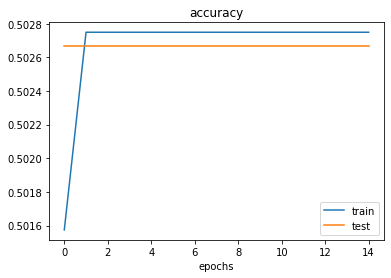

In [35]:
plt.plot(range(EPOCHS), log['train_accuracy'])
plt.plot(range(EPOCHS), log['test_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

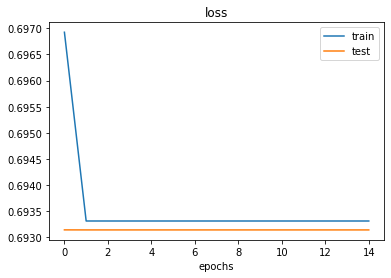

In [36]:
plt.plot(range(EPOCHS), log['train_loss'])
plt.plot(range(EPOCHS), log['test_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

In [37]:
# Sample code for building and training a model
INPUT_SHAPE = 32*32
LEARNING_RATE = 0.01
EPOCHS = 25
TRAINLOADER = Dataloader(X_train['img'].tolist(), pd.DataFrame({'label':Y_train}), 2, batch_size=32)
TESTLOADER = Dataloader(X_test['img'].tolist(), pd.DataFrame({'label':Y_test}), 2)
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=48, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons=2, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons=2, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results=False)

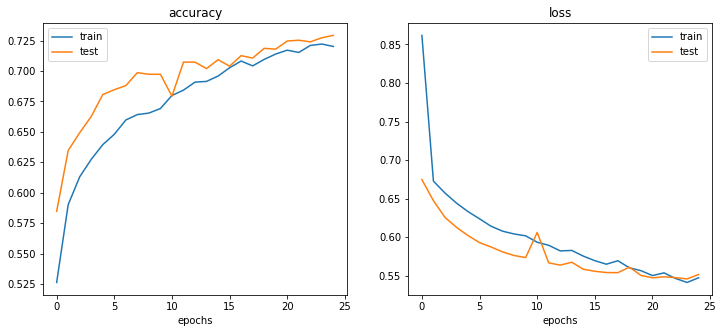

In [38]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(range(EPOCHS), log['train_accuracy'])
plt.plot(range(EPOCHS), log['test_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.subplot(122)
plt.plot(range(EPOCHS), log['train_loss'])
plt.plot(range(EPOCHS), log['test_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

## Zero initialization:
This method serves almost no purpose as it causes neurons to perform the same calculation in each iterations and produces same outputs.  If all the weights are initialized to zeros, the derivatives will remain same for every w. As a result, neurons will learn same features in each iterations. This problem is known as network failing to break symmetry. And not only zero, any constant initialization will produce a poor result.

In [39]:
# Sample code for building and training a model
INPUT_SHAPE = 32*32
LEARNING_RATE = 0.011
EPOCHS = 25
TRAINLOADER = Dataloader(X_train['img'].tolist(), pd.DataFrame({'label':Y_train}), 2, batch_size=32)
TESTLOADER = Dataloader(X_test['img'].tolist(), pd.DataFrame({'label':Y_test}), 2)
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=48, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons=2, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons=2, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.5430451127819549	Average Loss: 0.8672576894394403
	Test: Average Accuracy: 0.6013333333333334	Average Loss: 0.6612548196425182
Epoch 2:
	Train: Average Accuracy: 0.5943843984962406	Average Loss: 0.6668751095906018
	Test: Average Accuracy: 0.6433333333333333	Average Loss: 0.6338288621932343
Epoch 3:
	Train: Average Accuracy: 0.6144031954887218	Average Loss: 0.6514976434953392
	Test: Average Accuracy: 0.6493333333333333	Average Loss: 0.6231475958469772
Epoch 4:
	Train: Average Accuracy: 0.6334351503759399	Average Loss: 0.639809858502305
	Test: Average Accuracy: 0.6613333333333333	Average Loss: 0.6073169616838754
Epoch 5:
	Train: Average Accuracy: 0.6424812030075188	Average Loss: 0.6284746728650566
	Test: Average Accuracy: 0.672	Average Loss: 0.5987349805458136
Epoch 6:
	Train: Average Accuracy: 0.6545112781954887	Average Loss: 0.6172445650121657
	Test: Average Accuracy: 0.6846666666666666	Average Loss: 0.5882924223106908
Epoch 7:
	Train: Average Accur

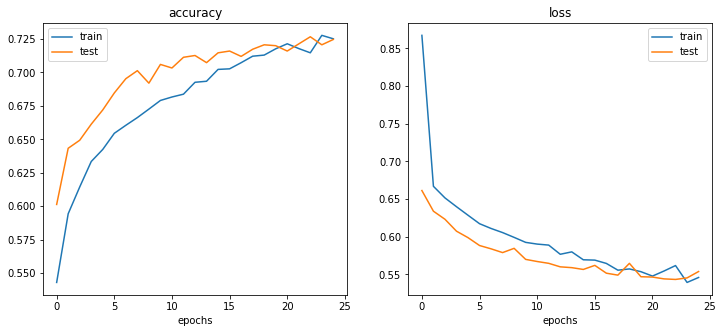

In [40]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(range(EPOCHS), log['train_accuracy'])
plt.plot(range(EPOCHS), log['test_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.subplot(122)
plt.plot(range(EPOCHS), log['train_loss'])
plt.plot(range(EPOCHS), log['test_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

## Learning Rate:
* A large learning rate allows the model to learn faster, while arriving on a sub-optimal final set of weights.
* A smaller learning rate may allow the model to learn a more optimal or even globally optimal set of weights but may take significantly longer to train (and may not converge at all).

$ lr = 0.01 $ is the optimal learning rate

In [41]:
# Sample code for building and training a model
INPUT_SHAPE = 32*32
LEARNING_RATE = 0.001
EPOCHS = 15
TRAINLOADER = Dataloader(X_train['img'].tolist(), pd.DataFrame({'label':Y_train}), 2, batch_size=32)
TESTLOADER = Dataloader(X_test['img'].tolist(), pd.DataFrame({'label':Y_test}), 2)
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=48, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons=2, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons=2, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.5013392857142857	Average Loss: 0.7004813867585149
	Test: Average Accuracy: 0.42733333333333334	Average Loss: 0.6934628676874379
Epoch 2:
	Train: Average Accuracy: 0.49570018796992477	Average Loss: 0.6934624319393868
	Test: Average Accuracy: 0.43	Average Loss: 0.6933692705503636
Epoch 3:
	Train: Average Accuracy: 0.4976503759398496	Average Loss: 0.6934139613885909
	Test: Average Accuracy: 0.42333333333333334	Average Loss: 0.6932820398851154
Epoch 4:
	Train: Average Accuracy: 0.49894266917293234	Average Loss: 0.6933688633063766
	Test: Average Accuracy: 0.44533333333333336	Average Loss: 0.6931995870288343
Epoch 5:
	Train: Average Accuracy: 0.5019266917293232	Average Loss: 0.6933261597174779
	Test: Average Accuracy: 0.494	Average Loss: 0.6931201334732902
Epoch 6:
	Train: Average Accuracy: 0.5036654135338345	Average Loss: 0.693284932994807
	Test: Average Accuracy: 0.5393333333333333	Average Loss: 0.6930420983778031
Epoch 7:
	Train: Average Accuracy: 0.50

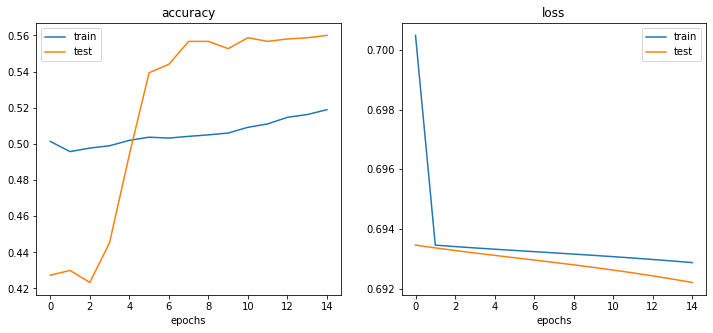

In [42]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(range(EPOCHS), log['train_accuracy'])
plt.plot(range(EPOCHS), log['test_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.subplot(122)
plt.plot(range(EPOCHS), log['train_loss'])
plt.plot(range(EPOCHS), log['test_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

## Activation Function

### Sigmoid & Tanh:
* Gradient vanishing phenomenon: When the activation function is close to the saturation region, the change is too slow, the derivative is close to 0, and the mathematical basis for the backward transfer is the chain rule of calculus derivation. So that the training of the deep network cannot be completed.

### ReLU:
* Dead ReLU Problem: Some neurons may never be activated, causing the corresponding parameters to never be updated (in the negative part, the gradient is 0).

### LeakyReLU:
* As a solution to the "Dead ReLU" problem, the derivative of the LeakyReLU is 1 in the positive part, and is a small fraction in the negative part.

In [43]:
# Sample code for building and training a model
INPUT_SHAPE = 32*32
LEARNING_RATE = 0.011
EPOCHS = 15
TRAINLOADER = Dataloader(X_train['img'].tolist(), pd.DataFrame({'label':Y_train}), 2, batch_size=32)
TESTLOADER = Dataloader(X_test['img'].tolist(), pd.DataFrame({'label':Y_test}), 2)
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=48, input_shape=INPUT_SHAPE, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(n_neurons=2, input_shape=INPUT_SHAPE, activation=Sigmoid(), weight_initializer='uniform')
network.add_layer(n_neurons=2, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.4996005639097745	Average Loss: 0.6957773217453754
	Test: Average Accuracy: 0.5026666666666667	Average Loss: 0.6955010530291017
Epoch 2:
	Train: Average Accuracy: 0.5003054511278195	Average Loss: 0.6947175783037614
	Test: Average Accuracy: 0.5026666666666667	Average Loss: 0.6953134741694686
Epoch 3:
	Train: Average Accuracy: 0.4996005639097745	Average Loss: 0.6945489118118713
	Test: Average Accuracy: 0.5026666666666667	Average Loss: 0.6952595410319736
Epoch 4:
	Train: Average Accuracy: 0.4993656015037594	Average Loss: 0.6944998209522295
	Test: Average Accuracy: 0.5026666666666667	Average Loss: 0.6952365531159488
Epoch 5:
	Train: Average Accuracy: 0.4993656015037594	Average Loss: 0.6944777819272483
	Test: Average Accuracy: 0.5026666666666667	Average Loss: 0.6952242347092177
Epoch 6:
	Train: Average Accuracy: 0.4993656015037594	Average Loss: 0.6944655230191354
	Test: Average Accuracy: 0.5026666666666667	Average Loss: 0.6952166703814647
Epoch 7:
	Train:

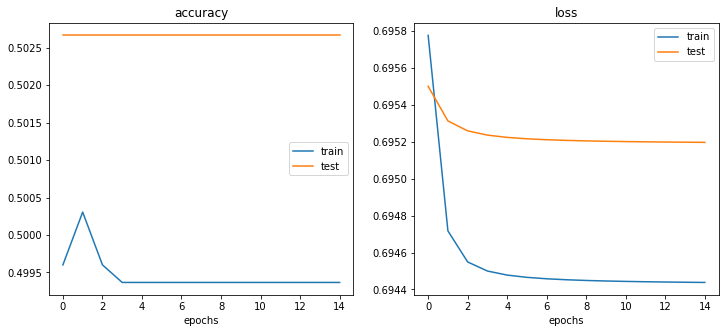

In [44]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(range(EPOCHS), log['train_accuracy'])
plt.plot(range(EPOCHS), log['test_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.subplot(122)
plt.plot(range(EPOCHS), log['train_loss'])
plt.plot(range(EPOCHS), log['test_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()

## Batch Size:

* Using Batch:

    $\checkmark$ It requires less memory. Since you train the network using fewer samples, the overall training procedure requires less memory. That's especially important if you are not able to fit the whole dataset in your machine's memory.

    $\checkmark$ Typically networks train faster with mini-batches. That's because we update the weights after each propagation. 

    $\times$ The smaller the batch the less accurate the estimate of the gradient will be.


In [45]:
# Sample code for building and training a model
INPUT_SHAPE = 32*32
LEARNING_RATE = 0.01
EPOCHS = 25
TRAINLOADER = Dataloader(X_train['img'].tolist(), pd.DataFrame({'label':Y_train}), 2, batch_size=16)
TESTLOADER = Dataloader(X_test['img'].tolist(), pd.DataFrame({'label':Y_test}), 2)
network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(n_neurons=48, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons=2, input_shape=INPUT_SHAPE, activation=LeakyRelu(), weight_initializer='uniform')
network.add_layer(n_neurons=2, activation=Identical(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER, print_results=False)

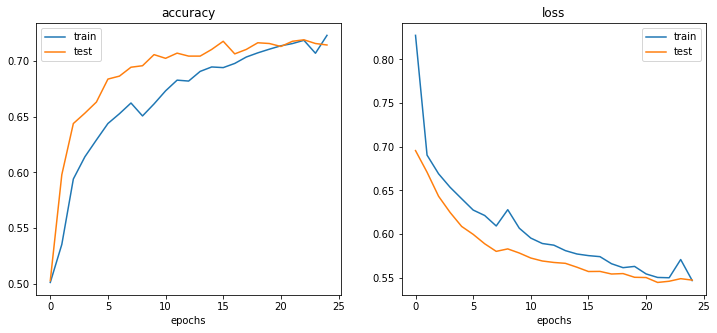

In [46]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.plot(range(EPOCHS), log['train_accuracy'])
plt.plot(range(EPOCHS), log['test_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.subplot(122)
plt.plot(range(EPOCHS), log['train_loss'])
plt.plot(range(EPOCHS), log['test_loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.show()